# Lean Six Sigma
## Author: Snigdhayan Mahanta

`Lean Six Sigma` is a well established process improvement methodology. Consider a company that manufactures several products at various locations and it is interested in improving the quality (e.g., reducing the number of defects in the manufactured products). There are several `Lean Six Sigma` tools that it can use to visualize and control the process. I created a curated dataset for this purpose and illustrated some of the tools below.

In [1]:
# Load Libraries
library("qcc")
library("plotrix")

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



In [2]:
# Create curated manufacting data
n_types = 3 # number of distinct product types
n_obs = 10000 # total number of observations

# Type of the products
productType <- round(sample(1:n_types, n_obs, replace = TRUE))
productType <- paste("P", productType, sep="")

# Number of defects per observation
defects <- round(abs(rnorm(n_obs, mean = 800, sd = 500)))

# Quantity of products per observation
quantity <- 1000*defects + round(abs(rnorm(n_obs, mean = 50000, sd = 100000)))

# Manufacturing locations
location <- sample(c("Germany", "France", "Spain", "Italy"), n_obs, replace = TRUE, prob = c(0.3, 0.4, 0.2, 0.1))

# Dataframe of manufacturing data
df <- data.frame("ProductType" = productType, "Quantity" = quantity, "Defects" = defects, "Location" = location)

In [3]:
# Generate a sample and visualize it
sample_size <- 100
myData <- df[sample(nrow(df), sample_size), ]
head(myData, 10)

,ProductType,Quantity,Defects,Location
,<fct>,<dbl>,<dbl>,<fct>
7051,P1,900324,732,France
5943,P3,535024,525,France
8438,P2,1171644,1009,France
4509,P1,570380,488,Italy
6317,P2,359183,315,Germany
9380,P3,1029220,918,France
5381,P1,754524,654,France
8364,P2,1738404,1621,Italy
5017,P1,453496,363,Italy


    
Pareto chart analysis for defectCount
       Frequency   Cum.Freq.  Percentage Cum.Percent.
  P1 40139.00000 40139.00000    46.15588     46.15588
  P3 29311.00000 69450.00000    33.70475     79.86063
  P2 17514.00000 86964.00000    20.13937    100.00000

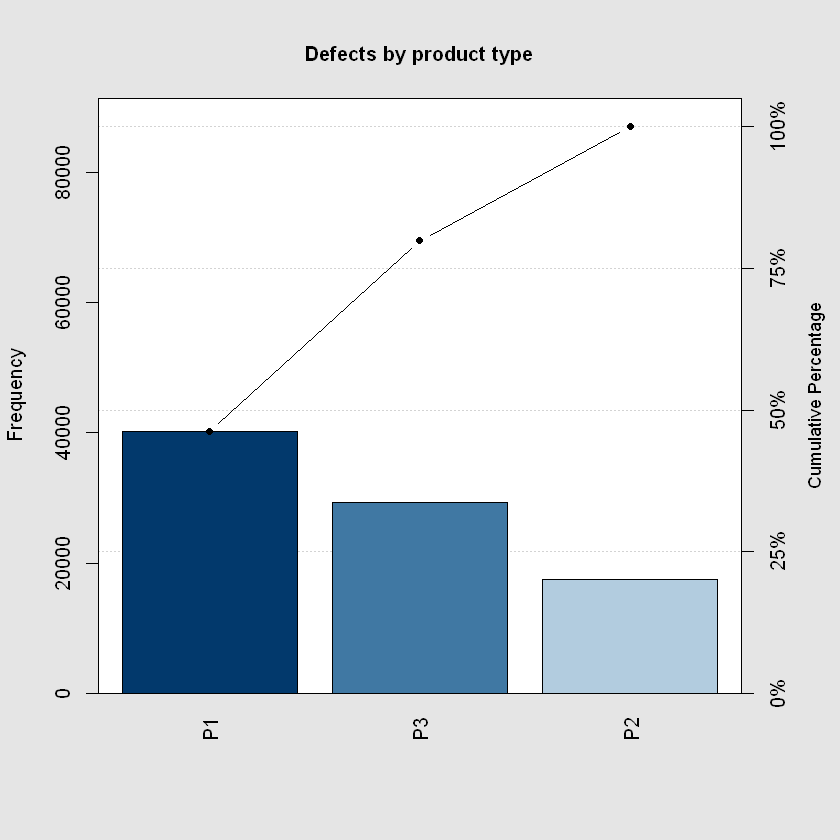

In [4]:
# Pareto chart
aggregatedData <- aggregate(myData$Defects, by=list(ProductType=myData$ProductType), FUN=sum)
names(aggregatedData)[2] <- "Defects"
defectCount <- aggregatedData$Defects
names(defectCount) <- aggregatedData$ProductType
pareto.chart(defectCount, main="Defects by product type")

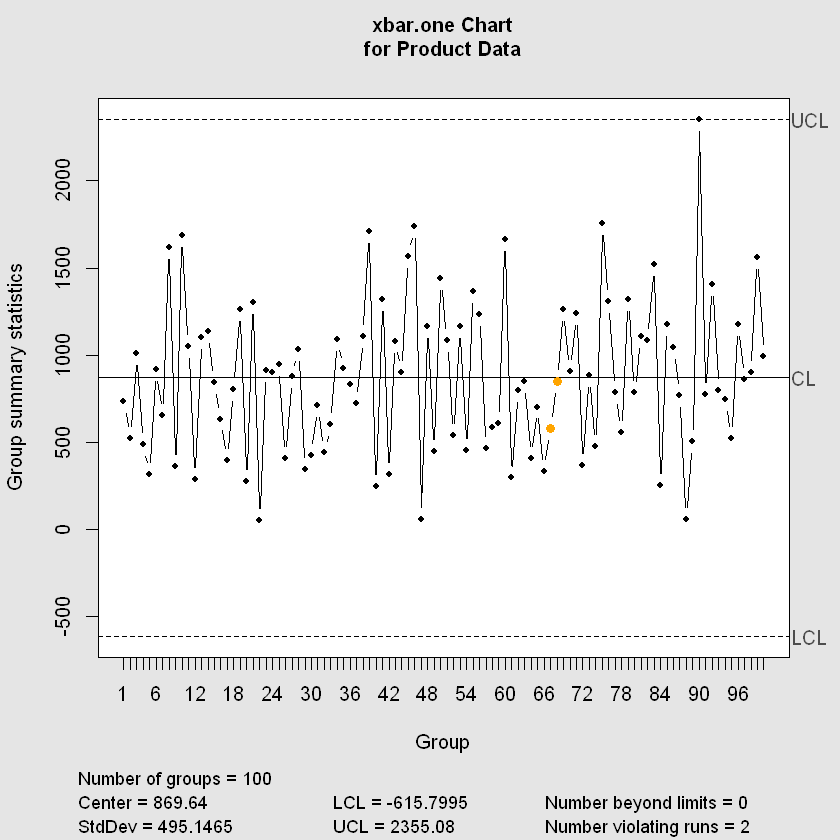

In [5]:
# Create QCC object for dataset and plot control chart 
xbar = qcc(myData$Defects, data.name="Product Data", type="xbar.one", nsigmas=3)


Process Capability Analysis

Call:
process.capability(object = xbar, spec.limits = c(200, 600),     breaks = 20)

Number of obs = 100          Target = 400
       Center = 869.6           LSL = 200
       StdDev = 495.1           USL = 600

Capability indices:

         Value      2.5%    97.5%
Cp     0.13464   0.11590   0.1533
Cp_l   0.45080   0.37476   0.5268
Cp_u  -0.18152  -0.12273  -0.2403
Cp_k  -0.18152  -0.11147  -0.2516
Cpm    0.09769   0.08128   0.1141

Exp<LSL 8.8%	 Obs<LSL 3%
Exp>USL 71%	 Obs>USL 69%


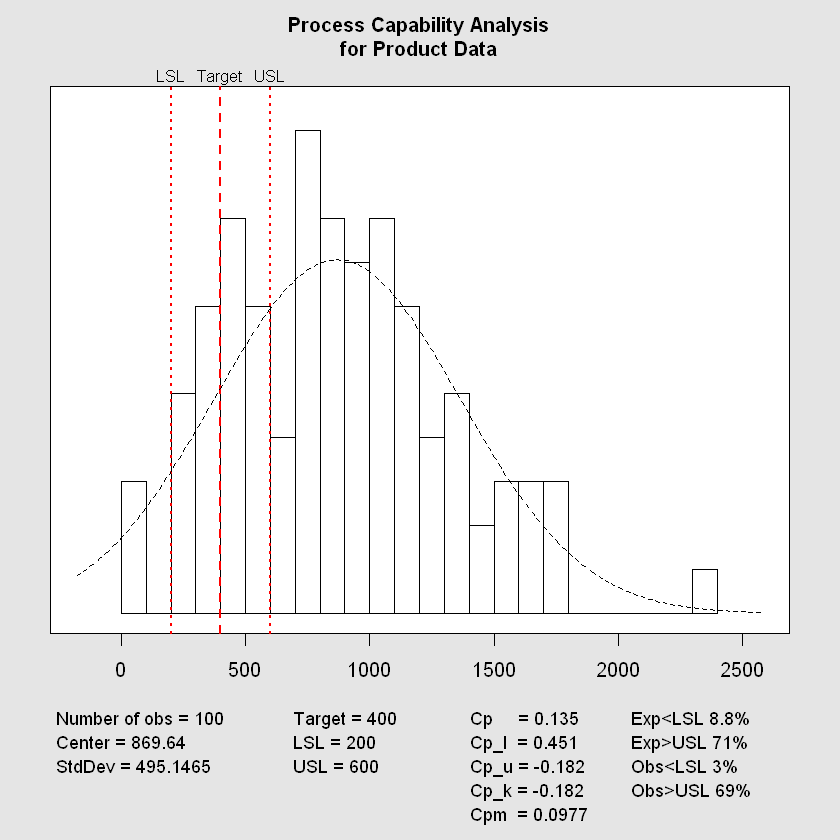

In [6]:
# Capability Analysis
process.capability(xbar, spec.limits=c(200, 600), breaks=20,)

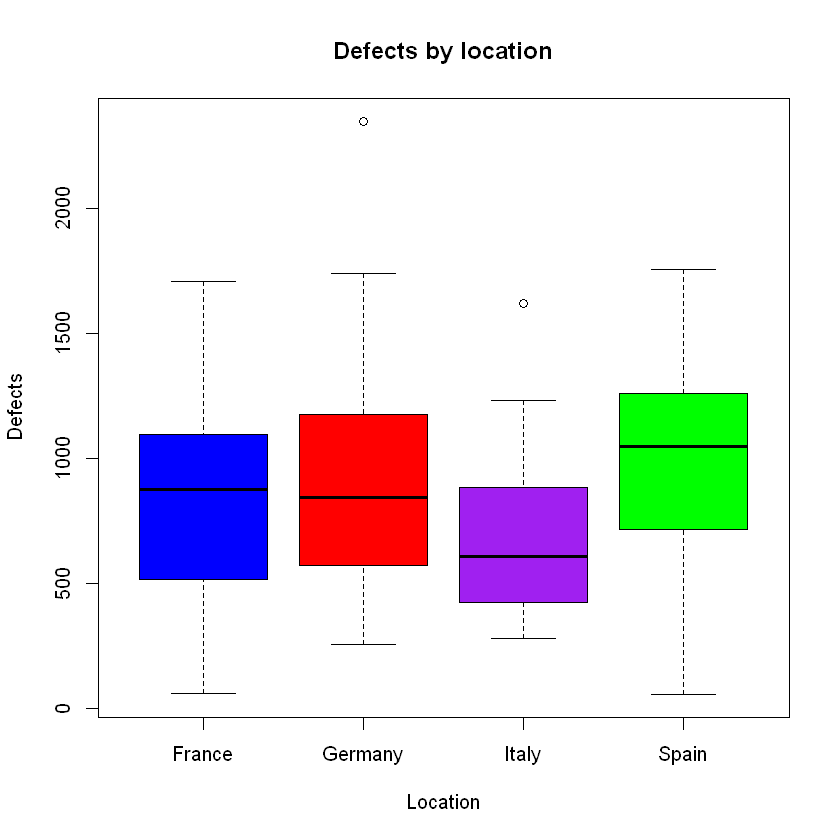

In [7]:
# Boxplot of defects by location
boxplot(data=myData, Defects ~ Location, 
        col = c("blue", "red", "purple", "green"),
        ylab = "Defects",
        main = "Defects by location")

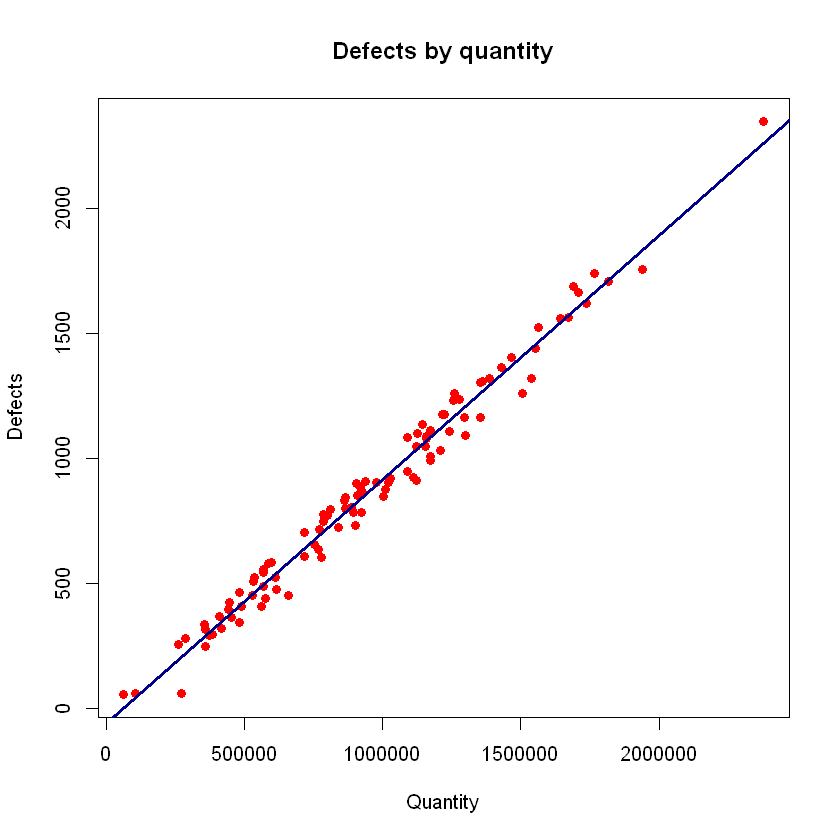

In [8]:
# Scatteroplot of defects by quantity
y = myData$Defects
x = myData$Quantity
plot(x, y,
     type ="p", #point
     col = "red",
     main = "Defects by quantity", 
     xlab = "Quantity",
     ylab = "Defects",
     pch = 16 # Set Visual Appearance of Datapoints
)

# Add best fit line to plot
linear_mod = (lm(y ~ x))
abline(linear_mod, col="darkblue", lwd=3)

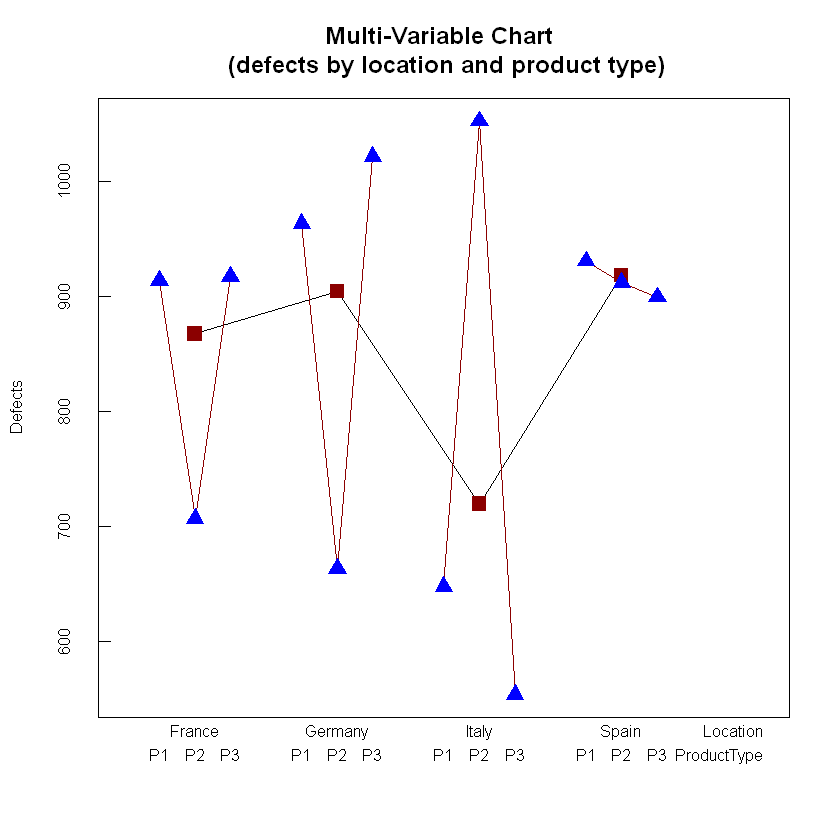

In [9]:
# Multivari chart of defects by location and product type
multivari("Defects",                          # Response 
          "Location", "ProductType",            # Factors  
          data = myData,                      # Data 
          col = list("darkred", "blue"),
          pch = list(15, 17), 
          xlab.depth = 2,
          legend = FALSE,
          cex = 0.8,
          main = "Multi-Variable Chart \n (defects by location and product type)",
          )

In [10]:
# Analysis of variance (ANOVA)
res.aov <- aov(Defects ~ Location, data = myData)
# Summary of the analysis
summaryAnova <- summary(res.aov)
summaryAnova

            Df   Sum Sq Mean Sq F value Pr(>F)
Location     3   376371  125457   0.637  0.593
Residuals   96 18909354  196972               

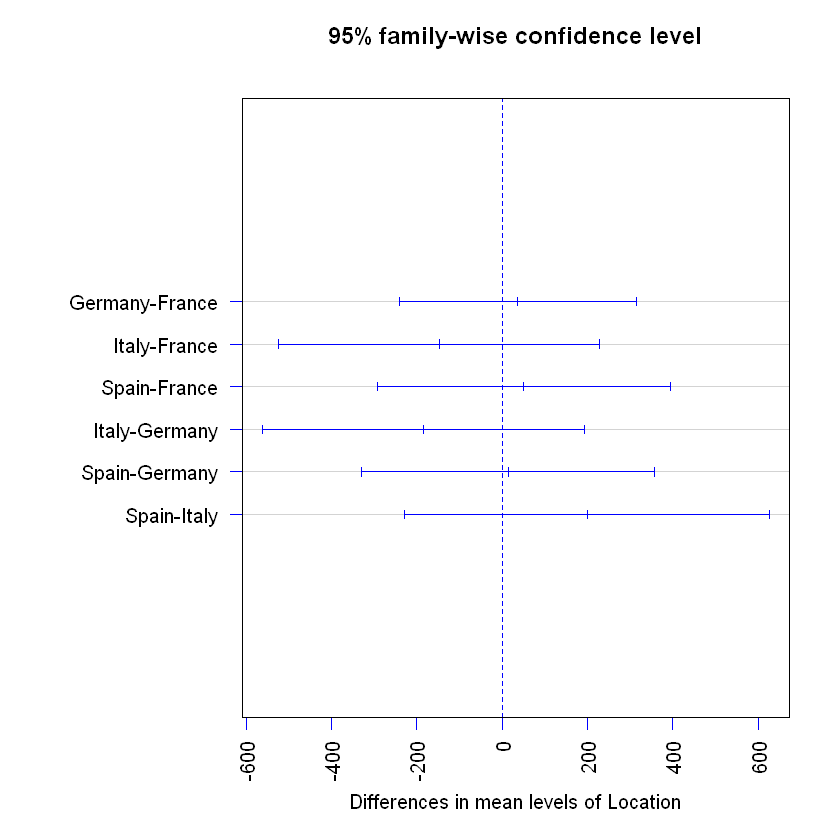

In [11]:
# Tukey test to differentiate the means
TukeyTest <- TukeyHSD(res.aov)
par(mar=c(5.1, 10.1, 4.1, 2.1), mgp=c(3, 1, 0), las=2)
plot(TukeyTest, asp = 100, col = "blue") # ascertain the significance of the differences between the observed means
# TukeyTest